![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

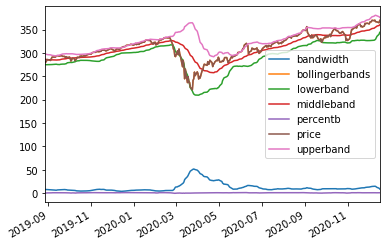

In [6]:
# QuantBook Analysis Tool 
# For more information see [https://www.quantconnect.com/docs/research/overview]
qb = QuantBook()
spy = qb.AddEquity("SPY")
history = qb.History(qb.Securities.Keys, 360, Resolution.Daily)

# Indicator Analysis
bbdf = qb.Indicator(BollingerBands(30, 2), spy.Symbol, 360, Resolution.Daily)
bbdf.drop('standarddeviation', 1).plot()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

qb = QuantBook()
spy = qb.AddEquity("SPY").Symbol
start_date = datetime(2010, 8, 1, 0, 0, 0)
end_date = qb.Time
spy_table = qb.History(spy, start_date, end_date, Resolution.Daily)
spy_total = spy_table[['open','close']]
# calculate log returns
spy_log_return = np.log(spy_total.close).diff().dropna()
print('Population mean:', np.mean(spy_log_return))


Population mean: 0.0005332987375751412


In [16]:
print('Population standard deviation:', np.std(spy_log_return))
print('10 days sample returns', np.mean(spy_log_return.tail(10)))
print('10 days sample standard deviation:', np.std(spy_log_return.tail(10)))
print('1000 days sample return', np.mean(spy_log_return.tail(1000)))
print('1000 days sample standard deviation:', np.std(spy_log_return.tail(1000)))

Population standard deviation: 0.010677440138211343
10 days sample returns 0.0009706306407308851
10 days sample standard deviation: 0.006038110065256539
1000 days sample return 0.0005643018657480567
1000 days sample standard deviation: 0.012422287977332516


In [27]:
# if we want to estimate an interval of the population so that 95% of the time the interval 
# will contain the population mean, the interval is calculated as:
# (μ−1.96∗SE,μ+1.96∗SE)
# where μ is the sample mean and SE is the standard error
# SE = σ/√n
# This interval is called confidence interval

# We usually use 1.96 to calculate a 95% confidence interval because we assume that
# the sample mean follows normal distribution

# apply the formula above to calculate confidence interval
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
upper_2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))

# print the outcomes
print('10 days 95% confidence interval: ', (bottom_1, upper_1))

print('1000 days 95% confidence interval: ', (bottom_2, upper_2))


10 days 95% confidence interval:  (-0.002771828750792838, 0.004713090032254608)
1000 days 95% confidence interval:  (-0.0002056395199263217, 0.001334243251422435)


In [ ]:
# Central limit theorem tells us that give a sufficiently large sample size from a population
# with a finite level of variance, the mean of all samples from the same population will be 
# approximately normal distributed. This is the foundation of population mean and confidence
# interval estimation

In [31]:
# Hypothesis testing: Is mean of large population such as S&P is 0 (zero)

mean_1000 = np.mean(spy_log_return.tail(1000))
std_1000 = np.std(spy_log_return.tail(1000))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_1000,std_1000],index = ['mean_10', 'std_10','mean_1000','std_1000'])
print(s)

bottom = 0 - 1.64*std_1000/np.sqrt(1000)
upper = 0 + 1.64*std_1000/np.sqrt(1000)
print((bottom, upper))

# 90% of 1000 sample is not zero, so we reject the hypothesis, lets try for 95%
bottom = 0 - 1.96*std_1000/np.sqrt(1000)
upper = 0 + 1.96*std_1000/np.sqrt(1000)
print((bottom, upper))
# This time the sample mean is within the confidence level

mean_10      0.000971
std_10       0.006038
mean_1000    0.000564
std_1000     0.012422
dtype: float64
(-0.0006442366696459085, 0.0006442366696459085)
(-0.0007699413856743784, 0.0007699413856743784)


In [34]:
# If the test value is outside the confidence interval, we reject the null hypothesis,
# or accept the alternative hypothesis; If the tested value is within the confidence interval,
# we can't reject the null hypothesis.
# The critical value or the z-score can be calculated by following
# Z=X−μ/σ/√n
print(np.sqrt(1000)*(mean_1000 - 0)/std_1000)

# The higher the Z score is, the further the tested value is from the hypothesized value
# (which is 0 in this example). Thus with 90% confidence level, 
# we are far away enough from zero and we reject the null hypothesis.
# However with 95% confidence level, 
# we are not far away enough from zero, so we can't reject the null hypothesis.

1.4365141002226254


In [37]:
import scipy.stats as st
print((1-st.norm.cdf(1.4365)))
# 1-st.norm.cdf(1.4365) will return the probability that the value is greather than our tested value
# the number calculated above is called p-value

# if our confidence interval is 95%, then we have 2.5% on the left side and 2.5% on the right side
# this is called two-tail test

mean_1200 = np.mean(spy_log_return.tail(1200))
std_1200 = np.std(spy_log_return.tail(1200))
z_score = np.sqrt(1200)*(mean_1200 - 0)/std_1200
print('z-score = ',z_score)
p_value = (1 - st.norm.cdf(z_score))

0.07543005817357196
z-score =  1.7134207854841246
